## Introduction to this notebook

In this notebook I will try to improve the results of my model through feature expansion.
The R2-score of the first model with 'Linear Regression' was 0.82.

In [1]:
import sys

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# new utils
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# to visualize the column transformer and pipeline
set_config(display='diagram')

sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./data/bike-sharing-demand/train.csv", parse_dates=True, index_col=0)
df_copy = df.copy()

In [3]:
df_copy["year"] = df_copy.index.year
df_copy["month"] = df_copy.index.month
df_copy["hour"] = df_copy.index.hour

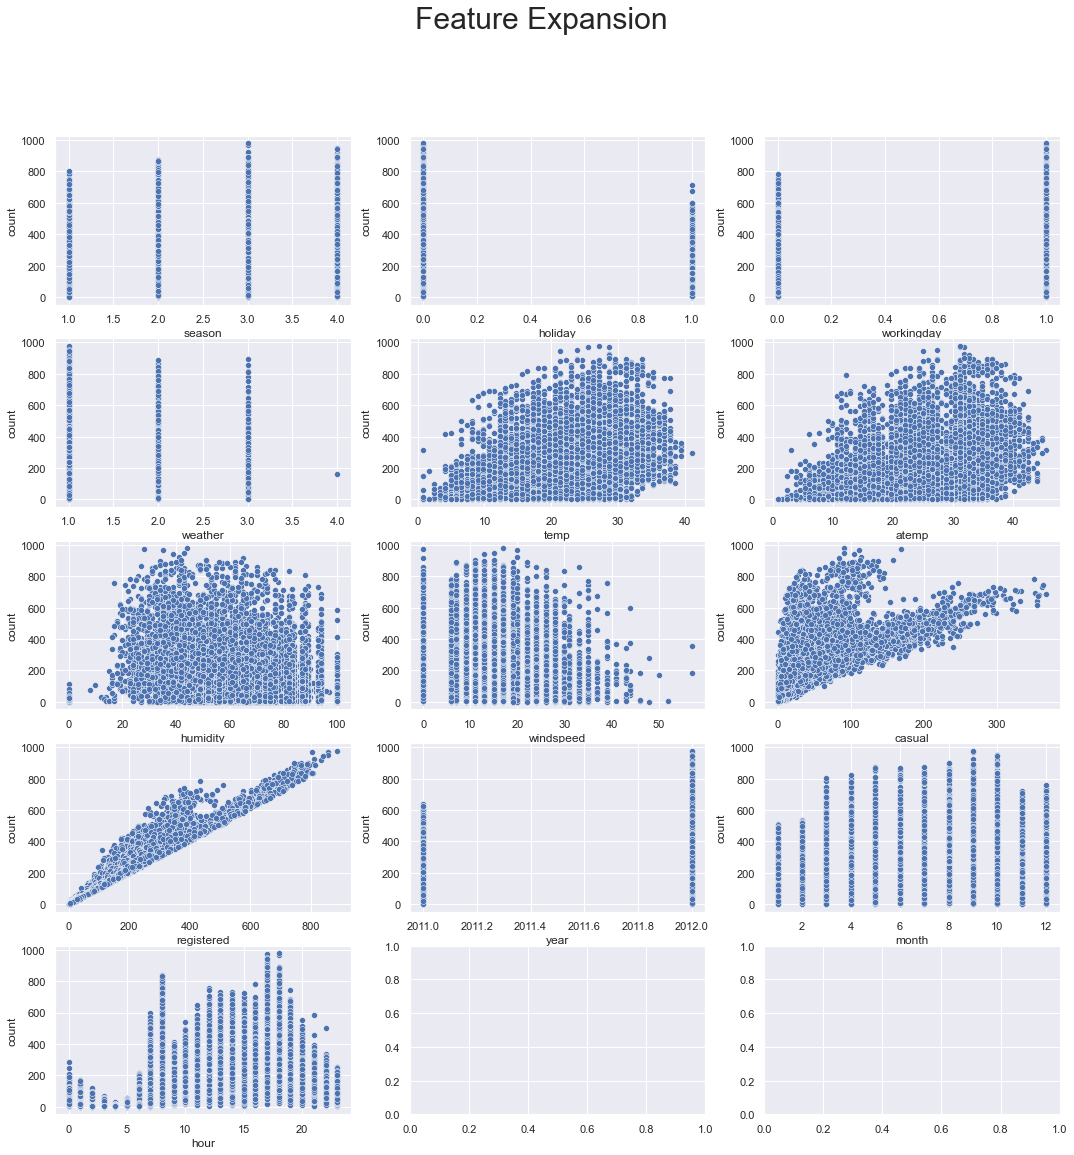

In [4]:
def plot_feature_expansion(dataframe, target_variable, figsize_hor, figsize_vert):
    """
    :param dataframe: The dataframe that includes all features
    :param target_variable: The column name of your target variable as string
    :param figsize_hor: The horizontal value for figsize as int
    :param figsize_vert: The vertical value for figsize as int
    :return: n Scatterplots (maximum of 15) that plot each feature against the target variable
    """
    x = determine_fig_size(dataframe)
    fig, axes = plt.subplots(x, 3, figsize=(18, 18))
    fig.suptitle('Feature Expansion', fontsize=30)

    j = 0
    k = 0

    for i in dataframe.columns.to_list():
        if i != target_variable:
            sns.scatterplot(ax=axes[j, k], data=dataframe, x=i, y=target_variable)

            if k == 2:
                j += 1
                k = 0
            else:
                k += 1

def determine_fig_size(dataframe):
    if dataframe.shape[1] <= 3:
        return 1
    elif dataframe.shape[1] <= 6:
        return 2
    elif dataframe.shape[1] <= 9:
        return 3
    elif dataframe.shape[1] <= 12:
        return 4
    elif dataframe.shape[1] <= 15:
        return 5
    else:
        sys.exit("Your dataframe consists of too many features")

plot_feature_expansion(df_copy, "count", 18, 18)

#Ugur: Use Lineplot, Barplot

**Observation**: Potential features for 'Feature Expansion':
* windspeed
* atemp
* hour

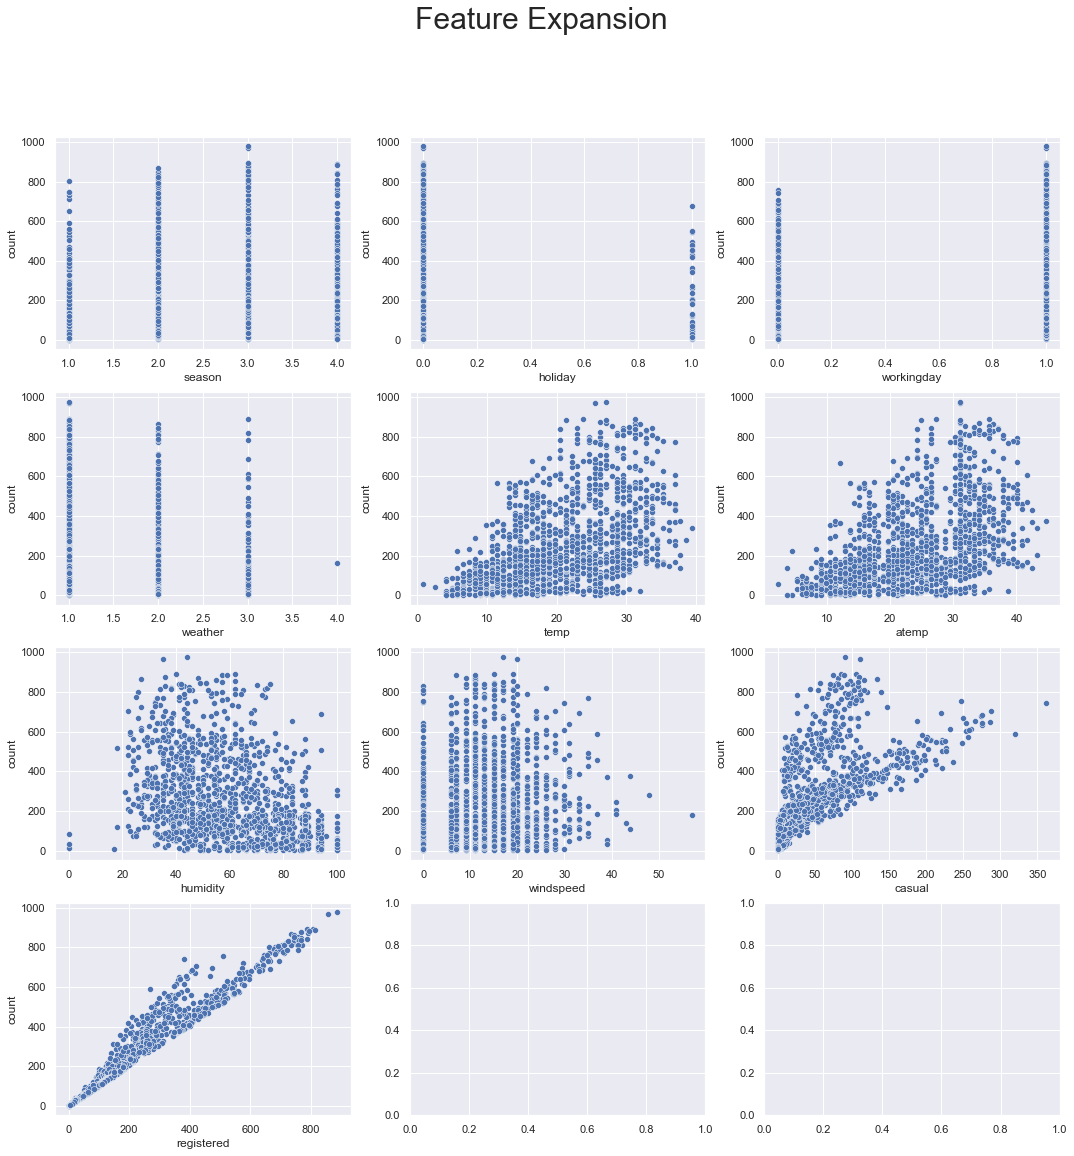

In [5]:
df6_12_18 = df[(df.index.hour == 6) | (df.index.hour == 12) | (df.index.hour == 18)]

plot_feature_expansion(df6_12_18, "count", 18, 18)

## Try feature Expansion on the isolated examples

### 2.1 "a_temp"

In [6]:
df_atemp = df[["atemp", "count"]]
X = df_atemp[["atemp"]]
y = df_atemp["count"]

In [7]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [8]:
lm.score(X, y).round(2)

0.15

**Observation**: As expected is a linear regression with the regualar data points **not** a good model to predict the relationship between "atemp" and "count"

In [9]:
df_atemp["count_pred"] = lm.predict(X)
df_atemp

,atemp,count,count_pred
datetime,,,
2011-01-01 00:00:00,14.395,16,114.422481
2011-01-01 01:00:00,13.635,40,108.090437
2011-01-01 02:00:00,13.635,32,108.090437
2011-01-01 03:00:00,14.395,13,114.422481
2011-01-01 04:00:00,14.395,1,114.422481
...,...,...,...
2012-12-19 19:00:00,19.695,336,158.580152
2012-12-19 20:00:00,17.425,241,139.667338
2012-12-19 21:00:00,15.910,168,127.044910


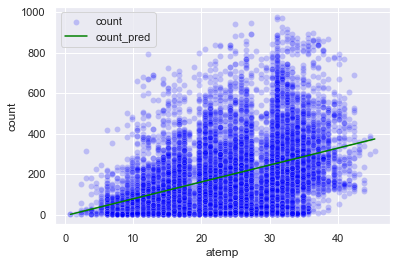

In [10]:
sns.scatterplot(data=df_atemp, x="atemp", y="count", color="blue", alpha=0.2, label="count");
sns.lineplot(data=df_atemp, x="atemp", y="count_pred", color="green", label="count_pred");

In [11]:
# Add atemp to the power of 2 and 3 to the model
df_atemp["atemp^2"] = df_atemp["atemp"]**2
df_atemp["atemp^3"] = df_atemp["atemp"]**3

In [12]:
lm = LinearRegression()

In [13]:
# Asign atemp^2 to X and refit the model
X = df_atemp[["atemp", "atemp^2", "atemp^3"]]
lm.fit(X, y)

LinearRegression()

In [14]:
lm.score(X, y).round(2)

0.15

**Observation**: The score of the linear regression has not changed. Apparently the feature expansion has **not** contributed to a better model.

## 2.2 "hour"

In [15]:
df_hour = df_copy[["hour", "count"]]
X = df_hour[["hour"]]
y = df_hour["count"]

In [16]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [17]:
lm.score(X,y).round(2)

0.16

In [18]:
df_hour["count_pred"] = lm.predict(X)
df_hour

,hour,count,count_pred
datetime,,,
2011-01-01 00:00:00,0,16,70.469994
2011-01-01 01:00:00,1,40,80.962820
2011-01-01 02:00:00,2,32,91.455646
2011-01-01 03:00:00,3,13,101.948472
2011-01-01 04:00:00,4,1,112.441298
...,...,...,...
2012-12-19 19:00:00,19,336,269.833688
2012-12-19 20:00:00,20,241,280.326514
2012-12-19 21:00:00,21,168,290.819340


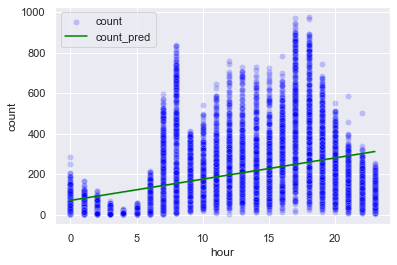

In [19]:
sns.scatterplot(data=df_hour, x="hour", y="count", color="blue", alpha=0.2, label="count")
sns.lineplot(data=df_hour, x="hour", y="count_pred", color="green", label="count_pred");

In [20]:
# Add atemp to the power of 2 and 3 to the model
df_hour["hour^2"] = df_hour["hour"]**2
df_hour["hour^3"] = df_hour["hour"]**3

In [21]:
# Asign atemp^2 to X and refit the model
X = df_hour[["hour", "hour^2", "hour^3"]]
lm.fit(X, y)

LinearRegression()

In [22]:
lm.score(X, y).round(2)

0.38

**Observation**: By applying the 'Feature Expansion' we were able to more than double the R2-score.

In [23]:
# Define a function to extract year, month and hour
def extract_year_month_hour(df):
    df = df.copy()
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["hour"] = df.index.hour
    return df

In [24]:
def feature_expansion(df, column, degree):
    df = df.copy()
    for i in range(2,degree+1):
        df[f"{column}^{i}"] = df[column] ** i
    return df


In [25]:
preprocessor_1 = (FunctionTransformer(extract_year_month_hour))

In [26]:
preprocessor_2 = (FunctionTransformer(feature_expansion, validate=False, kw_args={'column': 'hour', "degree": 3}))

In [27]:
numeric_features = ["atemp", "humidity", "windspeed"]
numeric_transformer = StandardScaler()

categorical_features = ["season", "holiday", "workingday", "weather", "year", "month", "hour"]
categorical_transformer = OneHotEncoder()

In [28]:
preprocessor_3 = ColumnTransformer(
    [
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)],
    remainder = 'passthrough'
)

In [29]:
linear_reg_pipeline = Pipeline(steps=[
    ("Create_new_columns", preprocessor_1),
    ("Feature_Expansion", preprocessor_2),
    ("ColumnTransformer", preprocessor_3),
    ("classifier", LinearRegression())
])

## 3. Train/Test Split and apply data preprocessing pipeline to the train data

In [30]:
y = df["count"]
X = df.loc[:, df.columns != "count"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 85)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 10), (2178, 10), (8708,), (2178,))

In [32]:
linear_reg_pipeline.fit(X_train, np.log1p(y_train))

Pipeline(steps=[('Create_new_columns',
                 FunctionTransformer(func=<function extract_year_month_hour at 0x7fdc6a41b700>)),
                ('Feature_Expansion',
                 FunctionTransformer(func=<function feature_expansion at 0x7fdc69732a60>,
                                     kw_args={'column': 'hour', 'degree': 3})),
                ('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['atemp', 'humidity',
                                                   'windspeed']),
                                                 ('cat', OneHotEncoder(),
                                                  ['season', 'holiday',
                                                   'workingday', 'weather',
                                                   'year', 'month',
                                                   'hour'])])),
                ('classifier', LinearRegression())])

In [33]:
print(f"""The train R2-score of the linear regression is: {round(linear_reg_pipeline.score(X_train,np.log1p(y_train)),2)}
The test R2-score of the linear regression is: {round(linear_reg_pipeline.score(X_test,np.log1p(y_test)),2)}""")

The train R2-score of the linear regression is: 0.89
The test R2-score of the linear regression is: 0.89


In [34]:
y_predict = linear_reg_pipeline.predict(X_test)
y_predict = np.expm1(y_predict).astype("int")

In [35]:
print(f"The R2 score of the train data after the reversed log-transformation is {round(r2_score(y_predict, y_test), 2)}")

The R2 score of the train data after the reversed log-transformation is 0.74
